## Data Visualization on Honey Production dataset using seaborn and matplotlib libraries.
### Domain: Food and agriculture


#### Context:
In 2006, a global concern was raised over the rapid decline in the honeybee population, an integral component
to American honey agriculture. Large numbers of hives were lost to “Colony-Collapse-Disorder”, a
phenomenon of disappearing “worker-bees” causing the remaining “hive-colony” to collapse. Speculation
around the cause of this disorder points to hive-diseases and pesticides harming the pollinators, though no
overall consensus has been reached. Twelve years later, some industries are observing recovery but the
American honey industry is still largely struggling. The U.S. used to locally produce over half the honey it
consumes per year. Now, honey mostly comes from overseas, with 350 of the 400 million pounds of honey
consumed every year originating from imports. This dataset provides insight into honey production supply and
demand in America by state from 1998 to 2012.


#### Q1) Import the libraries and read the dataset

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
honey_data=pd.read_csv('honeyproduction.csv')
honey_data.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


#### Q2). Check the first few samples, shape, info of the data and try to familiarize yourself with different features.


In [7]:
honey_data.shape

(626, 8)

In [8]:
honey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        626 non-null    object 
 1   numcol       626 non-null    float64
 2   yieldpercol  626 non-null    int64  
 3   totalprod    626 non-null    float64
 4   stocks       626 non-null    float64
 5   priceperlb   626 non-null    float64
 6   prodvalue    626 non-null    float64
 7   year         626 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 39.2+ KB


In [9]:
honey_data.isnull().sum()

state          0
numcol         0
yieldpercol    0
totalprod      0
stocks         0
priceperlb     0
prodvalue      0
year           0
dtype: int64

In [10]:
honey_data.state.unique()

array(['AL', 'AZ', 'AR', 'CA', 'CO', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN',
       'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MI', 'MN', 'MS', 'MO', 'MT',
       'NE', 'NV', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA',
       'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY', 'SC'],
      dtype=object)

In [19]:
honey_data[honey_data['totalprod']==honey_data.totalprod.max()]

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
532,ND,510000.0,91,46410000.0,12995000.0,1.5,69615000.0,2010


In [20]:
honey_data[honey_data['totalprod']==honey_data.totalprod.min()]

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
233,MD,2000.0,42,84000.0,21000.0,1.93,162000.0,2003


In [26]:
honey_data.groupby('state')[['year','totalprod']].value_counts()

state  year  totalprod
AL     1998  1136000.0    1
       1999  1156000.0    1
       2000  1248000.0    1
       2001  1022000.0    1
       2002  1032000.0    1
                         ..
WY     2008  2379000.0    1
       2009  1776000.0    1
       2010  1224000.0    1
       2011  1890000.0    1
       2012  2550000.0    1
Length: 626, dtype: int64

- In the year 2003, Honey production was least in US by state: MD
- In the year 2010, Honey production was max in US by state: ND
- from the year 1998 - 2012,
    - CA, ND, SD were the top 3 states having highest no. of honey production colonies
    - SC, OK, MD were the top 3 states having least no. of honey production colonies

In [30]:
honey_data.yieldpercol.describe()

count    626.000000
mean      62.009585
std       19.458754
min       19.000000
25%       48.000000
50%       60.000000
75%       74.000000
max      136.000000
Name: yieldpercol, dtype: float64

In [36]:
honey_data.groupby('state')['numcol'].sum().sort_values(ascending=False).head()

state
CA    6100000.0
ND    5555000.0
SD    3544000.0
FL    2928000.0
MT    2040000.0
Name: numcol, dtype: float64

In [38]:
honey_data.groupby('state')['numcol'].sum().sort_values(ascending=True).head()

state
SC    16000.0
OK    27000.0
MD    28000.0
KY    66000.0
VT    85000.0
Name: numcol, dtype: float64

#### Q3)  Display the percentage distribution of the data in each year using the pie chart.

In [59]:
honey_data.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


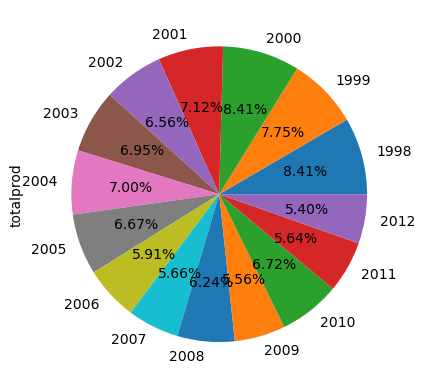

<Figure size 1000x1000 with 0 Axes>

In [65]:
honey_data.groupby('year')['totalprod'].sum().plot(kind='pie',autopct='%.2f%%')
plt.figure(figsize=(10,10))
plt.show()

#### Q4) Plot and Understand the distribution of the variable "price per lb" using displot, and write your findings

In [66]:
honey_data['priceperlb'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 626 entries, 0 to 625
Series name: priceperlb
Non-Null Count  Dtype  
--------------  -----  
626 non-null    float64
dtypes: float64(1)
memory usage: 5.0 KB


In [67]:
honey_data['priceperlb'].describe()

count    626.000000
mean       1.409569
std        0.638599
min        0.490000
25%        0.932500
50%        1.360000
75%        1.680000
max        4.150000
Name: priceperlb, dtype: float64

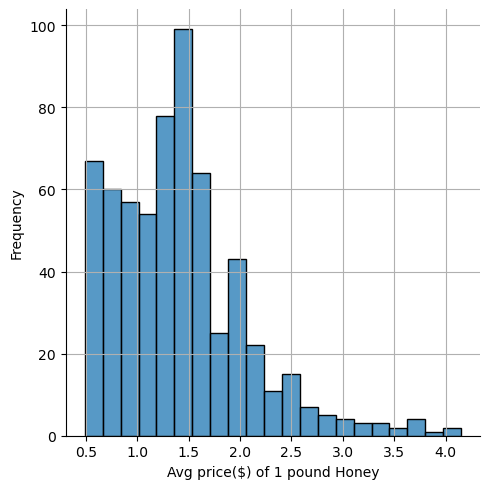

In [79]:
#honey_data['priceperlb'].plot(kind='hist')
sns.displot(honey_data['priceperlb'])
plt.xlabel('Avg price($) of 1 pound Honey')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#### Honey whose 1pound avg price is '1.5dollars' is produced more than ones whose price of 1pound > '3 dollar'

#### Q5) Plot and understand the relationship between the variables 'numcol' and 'prodval' through scatterplot, and write your findings.


In [85]:
honey_data['prodvalue'].max(),honey_data['prodvalue'].min()

(69615000.0, 162000.0)

In [86]:
honey_data['numcol'].max(),honey_data['numcol'].min()

(510000.0, 2000.0)

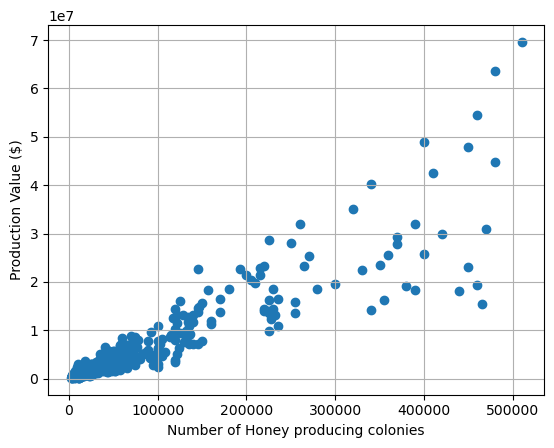

In [89]:
plt.scatter(honey_data['numcol'],honey_data['prodvalue'])
plt.xlabel('Number of Honey producing colonies')
plt.ylabel('Production Value ($)')
plt.grid(True)
plt.show()

- The distribution is kind of linear
- Lesser the number of production colonies, lesser was the production value of Honey
- More the number of production colonies, More was the production value of Honey
- In the dataset there are more instances where there was less numcols and less prodval

#### Q6) Plot and understand the relationship between categorical variable 'year' and a numerical variable 'prodvalue' through boxplot, and write your findings.


In [91]:
honey_data[['year','prodvalue']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       626 non-null    int64  
 1   prodvalue  626 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 9.9 KB


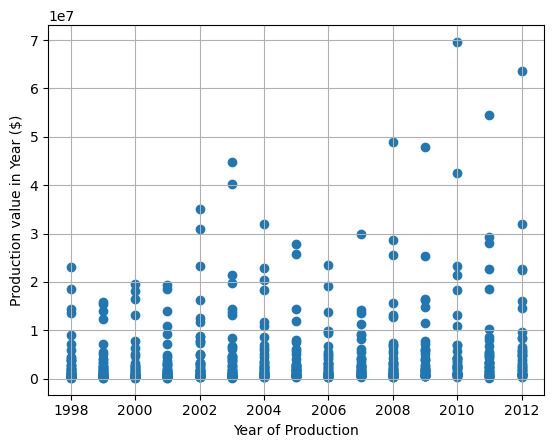

In [109]:
x=honey_data['year']
y=honey_data['prodvalue']
plt.scatter(x,y)
plt.grid(True)
#plt.xticks(x)
#plt.figure(figsize=(20,18))
plt.xlabel('Year of Production')
plt.ylabel('Production value in Year ($)')
plt.show()

<AxesSubplot:xlabel='year', ylabel='prodvalue'>

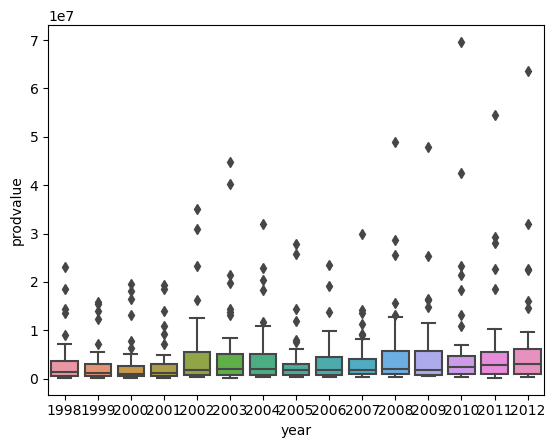

In [110]:
sns.boxplot(x=honey_data.year,y=honey_data.prodvalue)

- Production value ranges from 2 * 10^7(year:1998) to 7 * 10^7 (year:2010)
- There is increase in Production value after year 2005

#### Q7) Visualize and understand the relationship between the multiple pairs of variables throughout different years using pairplot and add your inferences. (use columns 'numcol', 'yield percol', 'total prod', 'prodvalue','year')


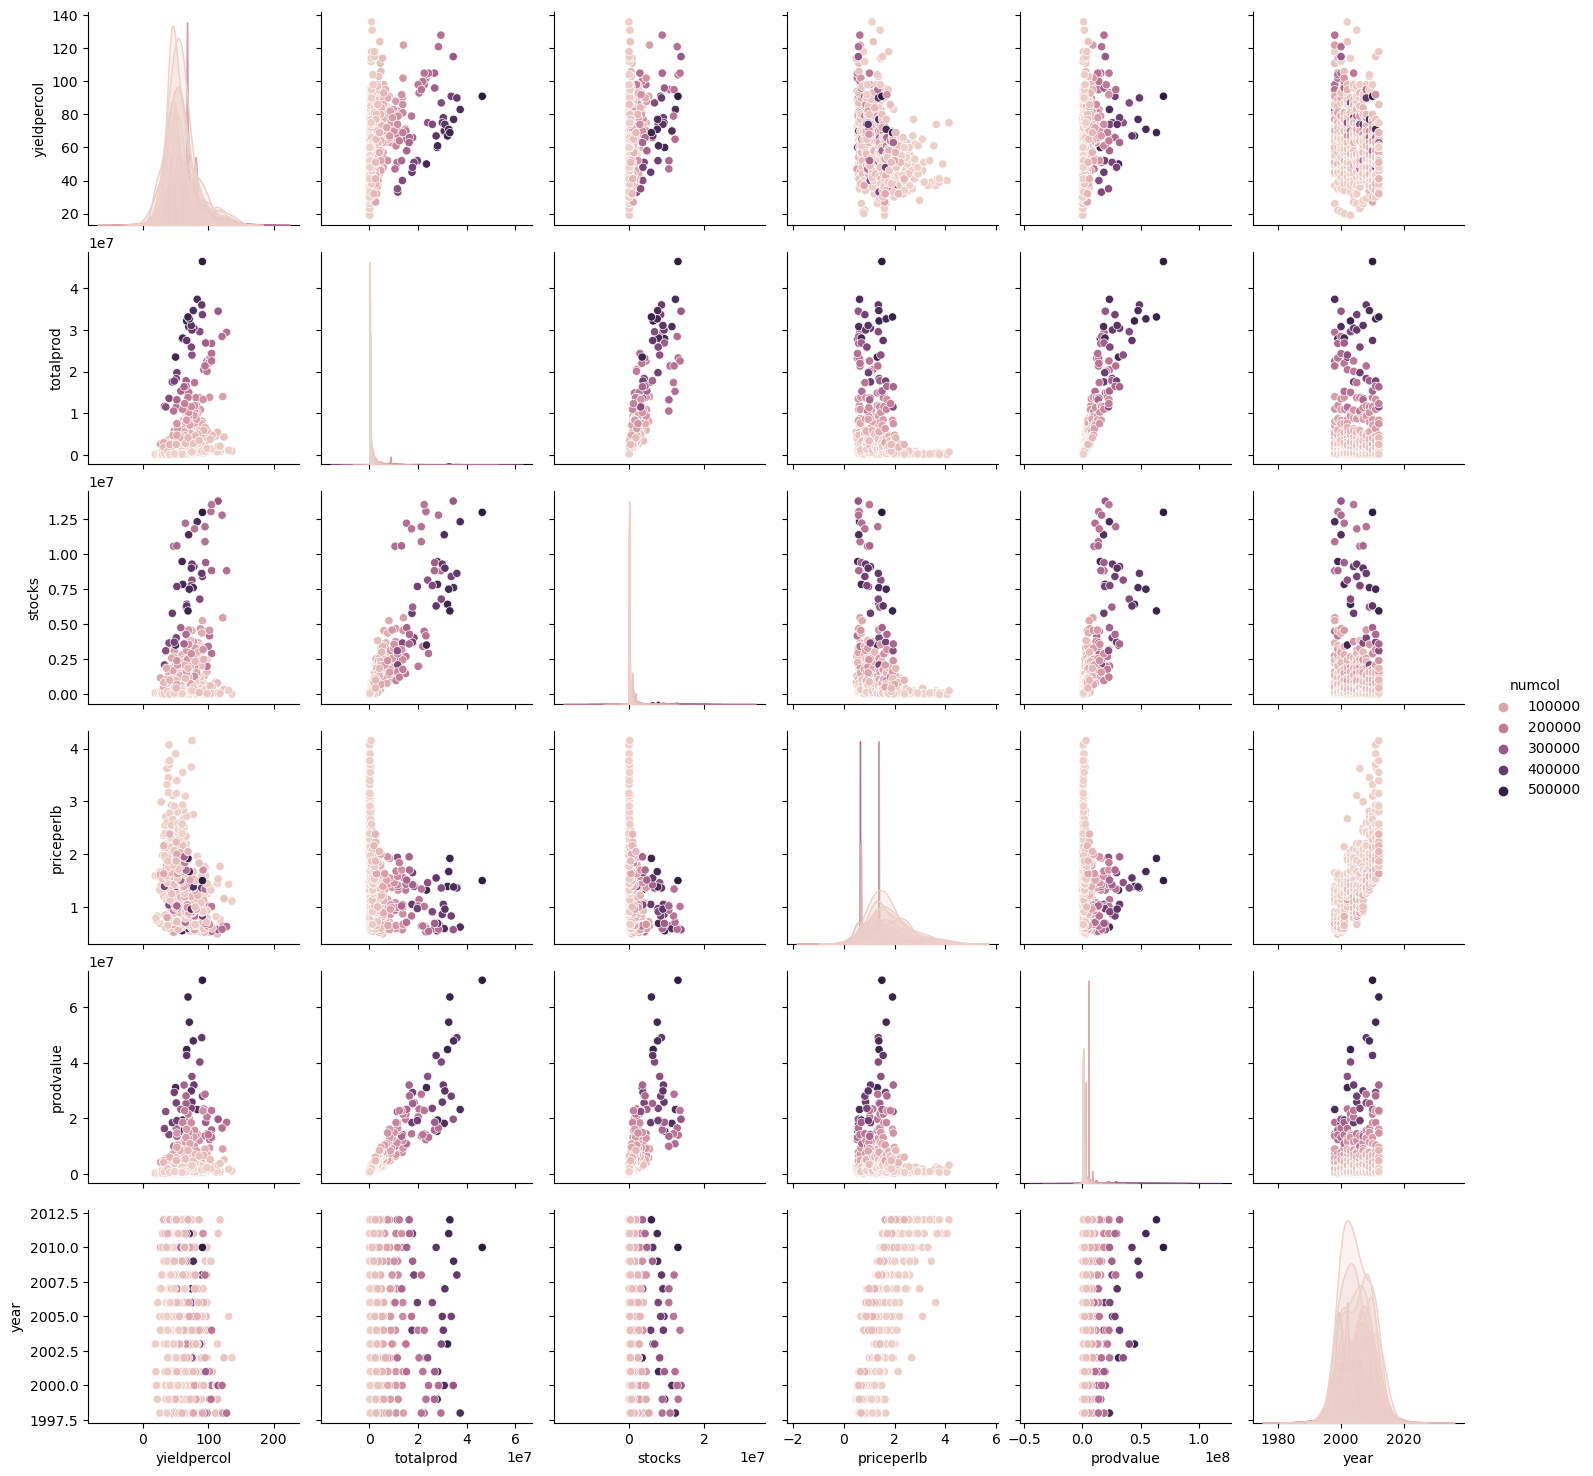

In [111]:
sns.pairplot(honey_data,hue='numcol')

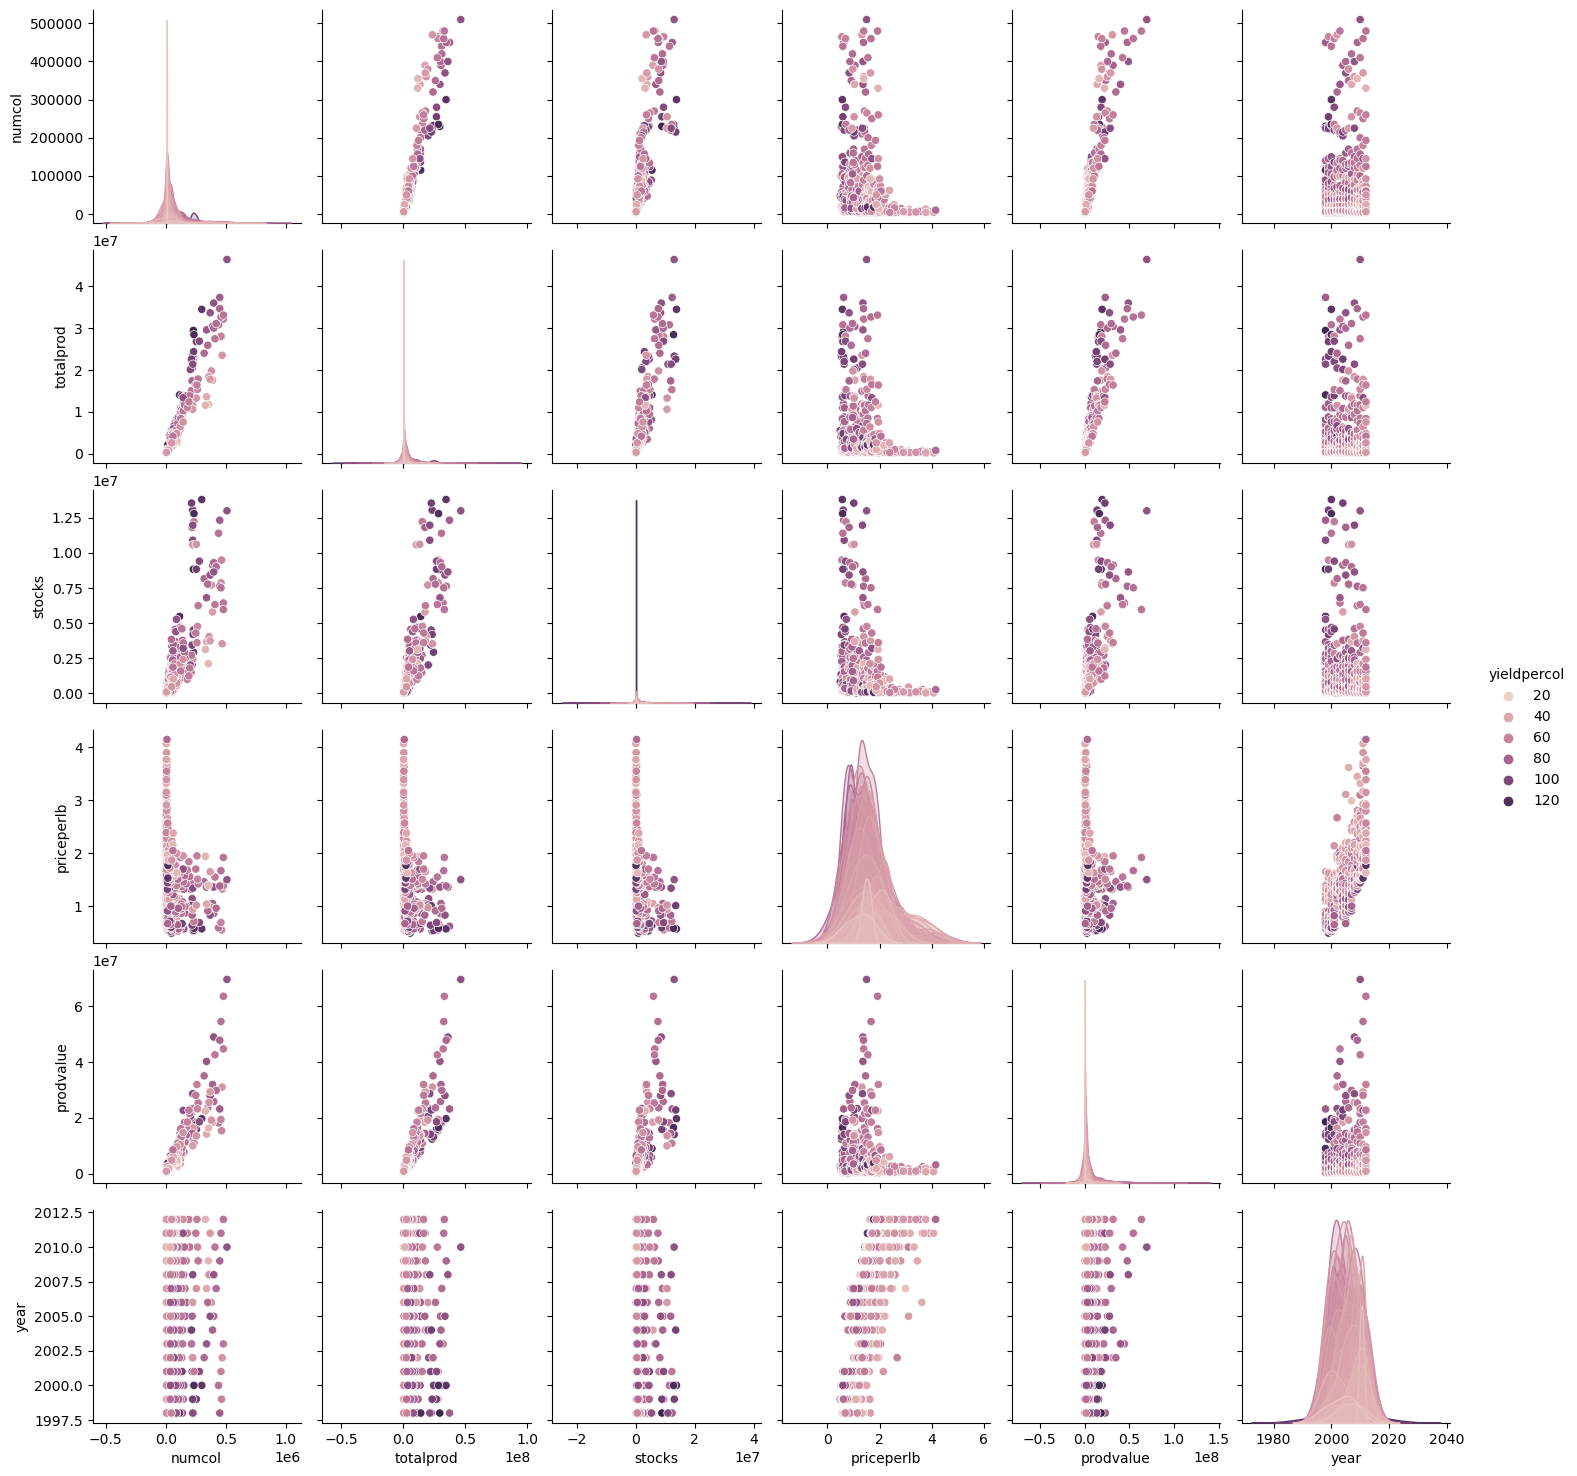

In [112]:
sns.pairplot(honey_data,hue='yieldpercol')

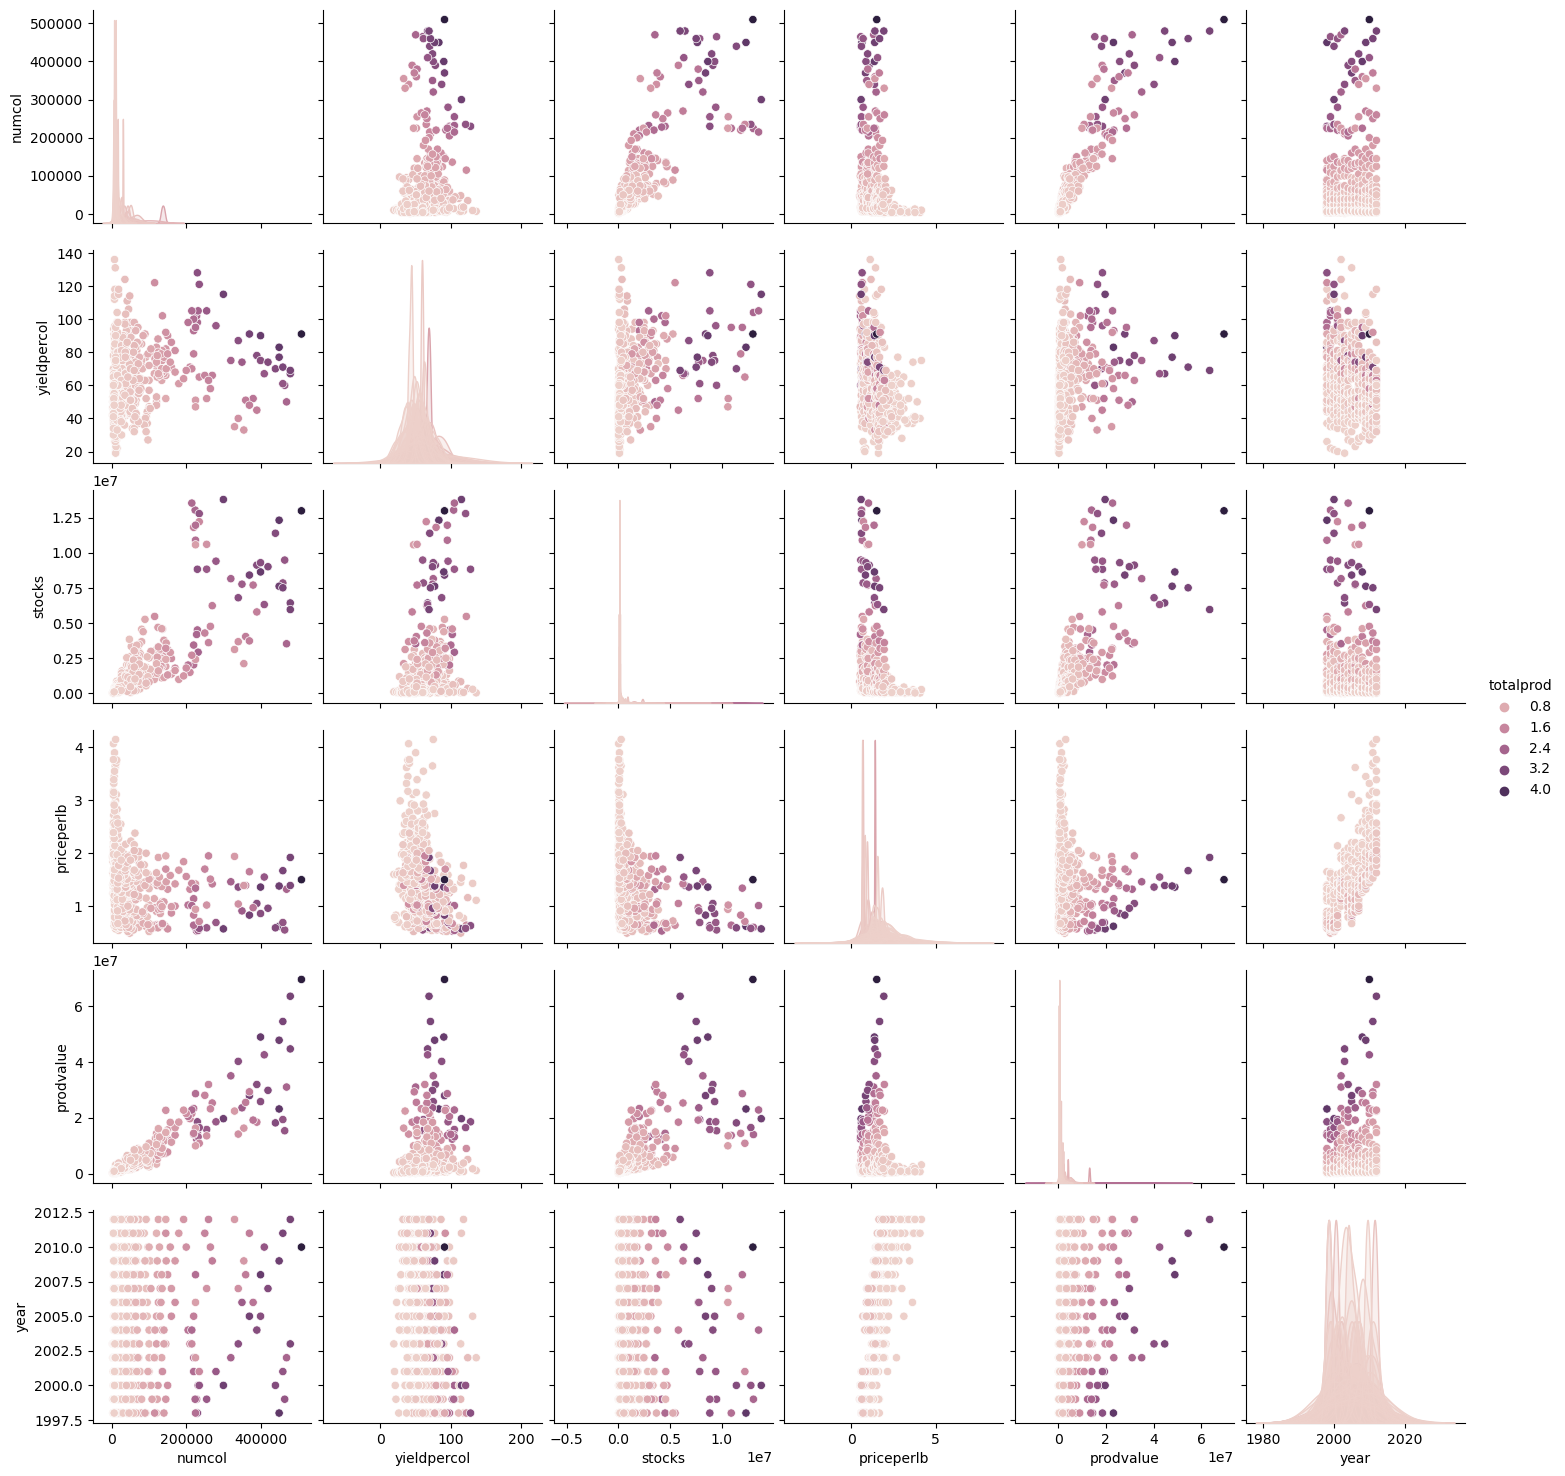

In [113]:
sns.pairplot(honey_data,hue='totalprod')

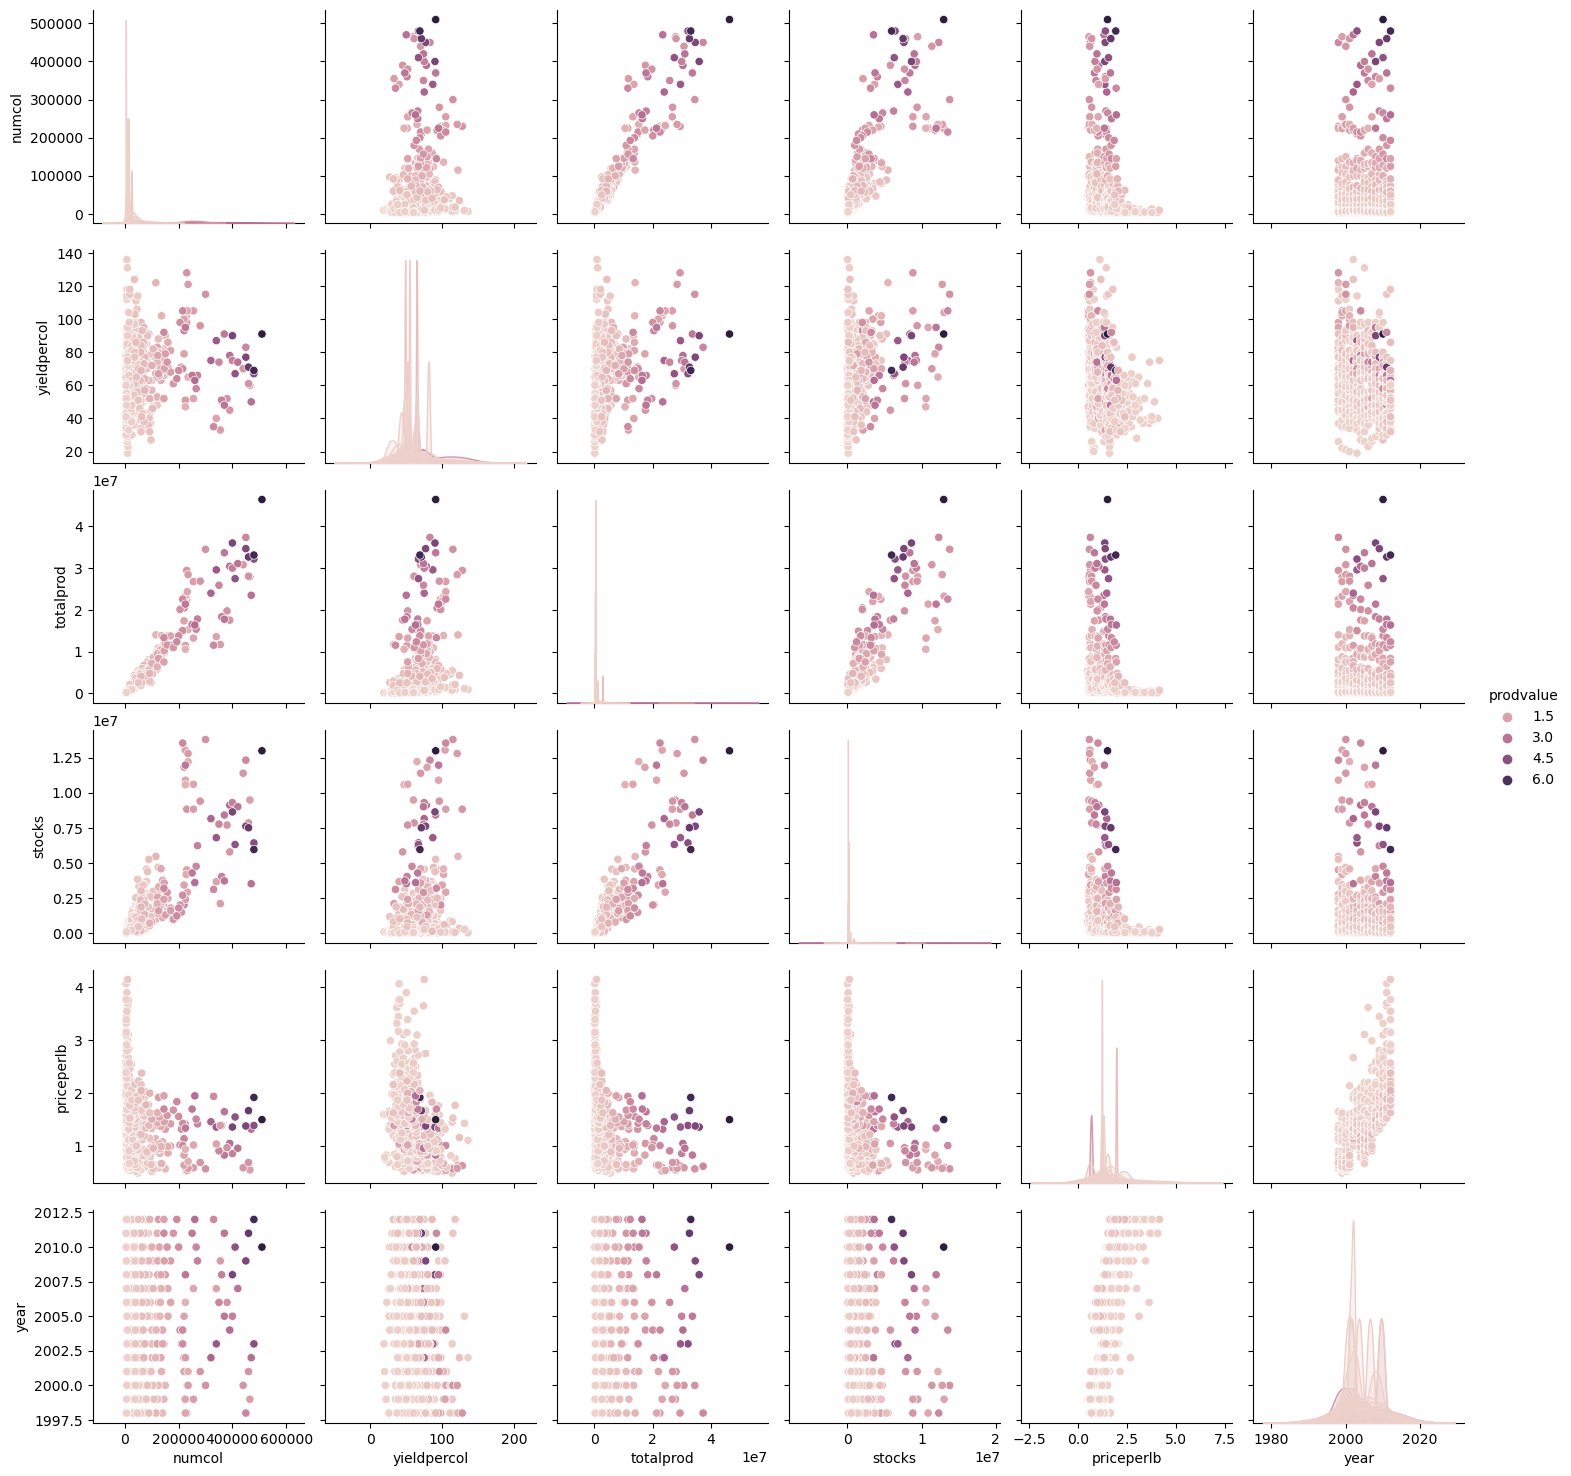

In [114]:
sns.pairplot(honey_data,hue='prodvalue')

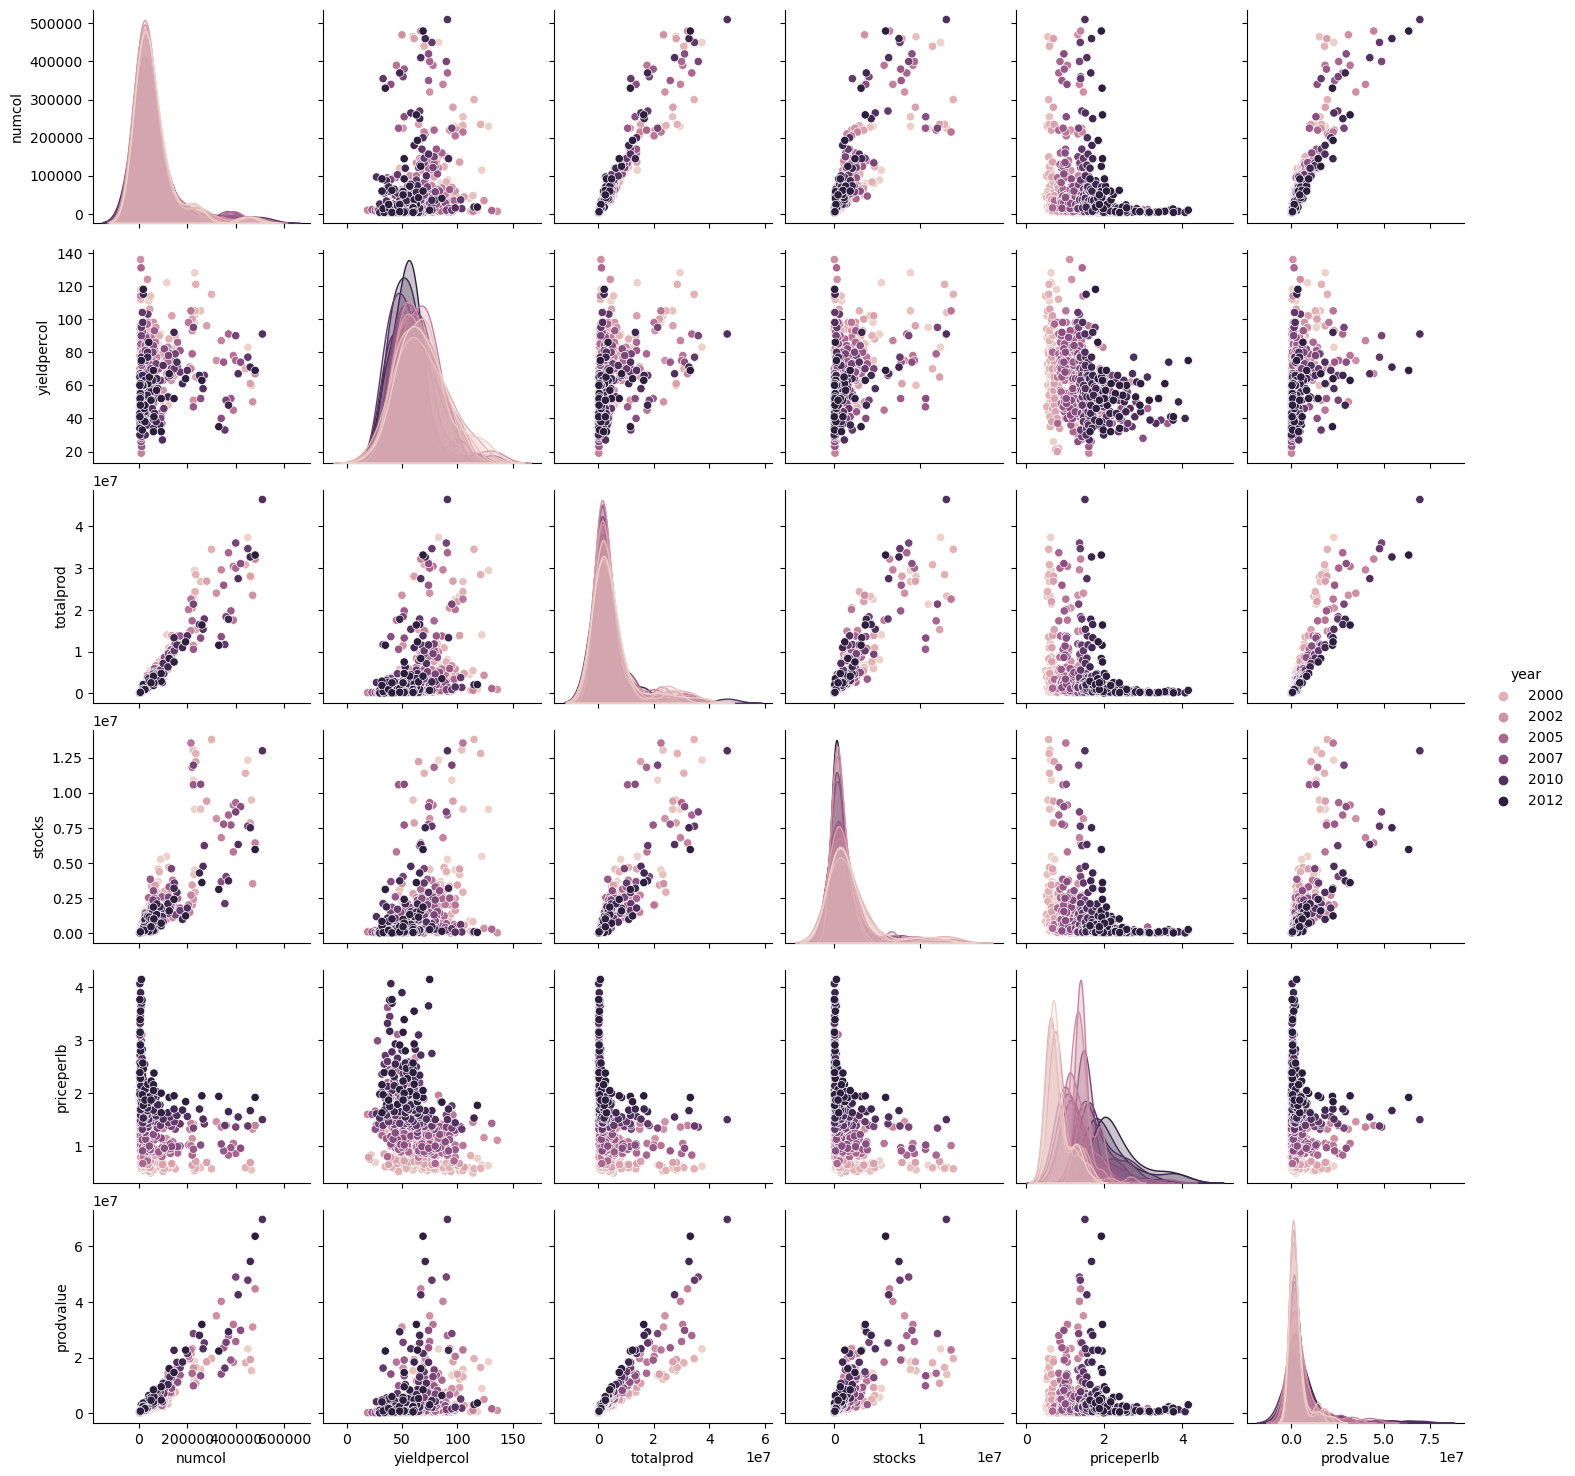

In [115]:
sns.pairplot(honey_data,hue='year')

#### Q8) Display the correlation values using a plot and add your inferences. (use columns 'numcol', 'yield percol', 'total prod', 'stocks', 'price per lb', 'prodvalue')


In [134]:
import matplotlib.pyplot as plt
x=honey_data.numcol
y=honey_data.yieldpercol
y.corr(y),round(x.corr(y),2)

(1.0, 0.24)